# Crypto Return Data Mining with Stumpy
### Matt Harrington

In [1]:
%matplotlib inline
# !pip uninstall scipy
!pip install --upgrade scipy>=1.5
!pip install stumpy

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime as dt

zsh:1: 1.5 not found


In [2]:
from coin_helpers import load_coins, simplify
from subsets import *
returns = load_coins()
hour_ret = simplify(returns, '1h')

Log-Returns Head:                           BTC       ETH  BCH  BNB  LINK  DOT  ADA  LTC  EOS  \
open_time                                                                     
2017-08-17 04:01:00  0.000000  0.000000  NaN  NaN   NaN  NaN  NaN  NaN  NaN   
2017-08-17 04:02:00  0.004467 -0.003759  NaN  NaN   NaN  NaN  NaN  NaN  NaN   
2017-08-17 04:03:00 -0.004467  0.000000  NaN  NaN   NaN  NaN  NaN  NaN  NaN   

                     XMR  ...  UMA  ONT  YFI  SNX  FTT  BTT  ALGO  DGB  DOGE  \
open_time                 ...                                                  
2017-08-17 04:01:00  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN   
2017-08-17 04:02:00  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN   
2017-08-17 04:03:00  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN   

                     REN  
open_time                 
2017-08-17 04:01:00  NaN  
2017-08-17 04:02:00  NaN  
2017-08-17 04:03:00  NaN  

[3 rows x 36 columns]


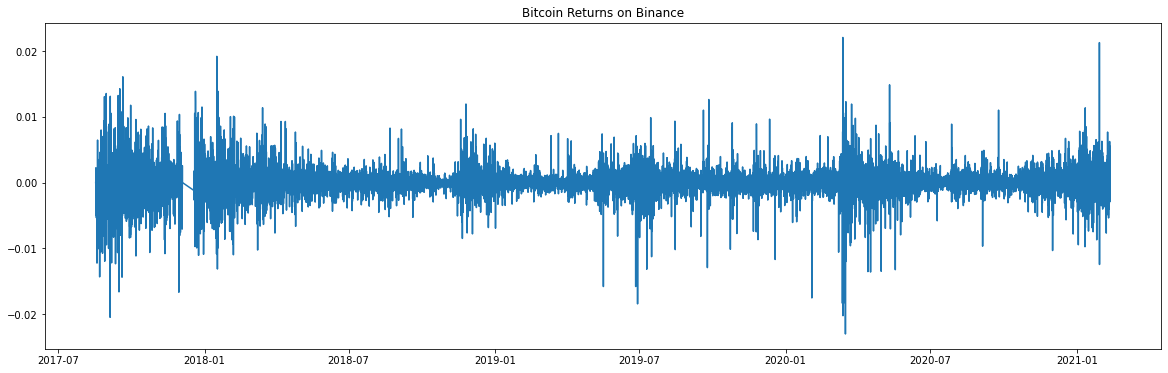

In [3]:
btc = hour_ret['BTC'].dropna()
fig=plt.figure(figsize=(20,6))
plt.plot(btc)
plt.title("Bitcoin Returns on Binance")
plt.show()

In [4]:
import time
tic = time.perf_counter()
mp = stumpy.stump(btc, 36)
toc = time.perf_counter()
print("{} Points analyzed in {} seconds".format(btc.shape[0], round(toc-tic, 3)))

30105 Points analyzed in 8.05 seconds


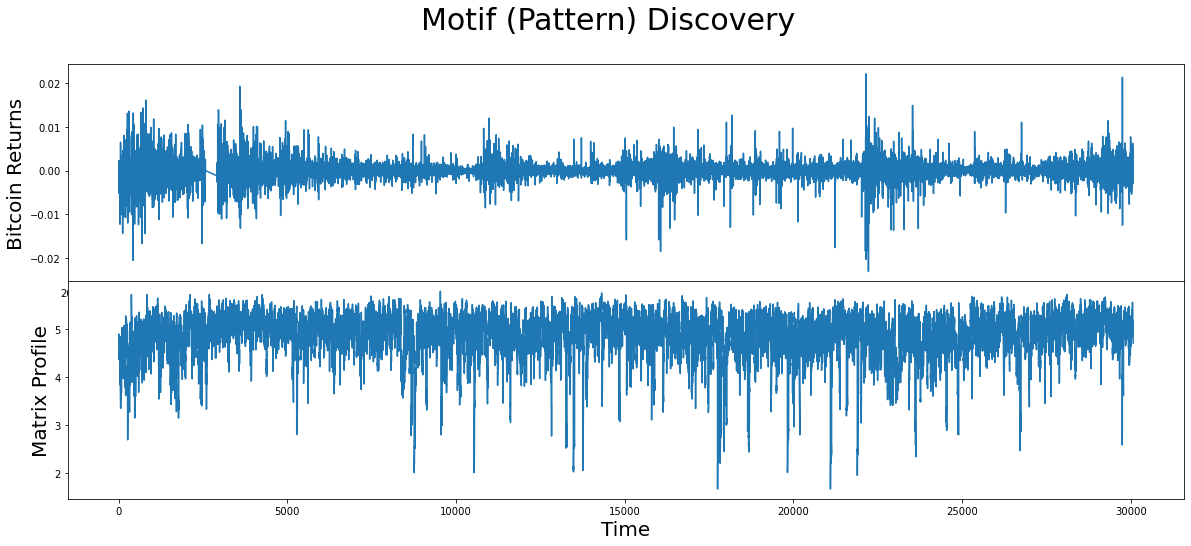

In [5]:
fig, axs = plt.subplots(2, gridspec_kw={'hspace': 0}, figsize=(20,8))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(btc)
axs[0].set_ylabel('Bitcoin Returns', fontsize='20')

axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
# axs[1].axvline(x=643, linestyle="dashed")
# axs[1].axvline(x=8724, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [6]:
mini = mp[:, 0].min()
maxi = mp[:, 0].max()
print(mini, maxi)

1.674911823439252 5.776766230602325


In [7]:
min_index = np.argwhere(mp[:, 0] == mini).flatten()[0]
max_index = np.argwhere(mp[:, 0] == maxi).flatten()[0]
print(min_index, max_index)

17750 9533
